In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz

## Step 1
Using the Scikit-Learn Library train the Decision Tree Classifier to the attached PhishingVsBenignURL data set using all of the features at once. (Dataset is originally from here: https://www.unb.ca/cic/datasets/url-2016.html )

In [ ]:
# Reading Data
df = pd.read_csv('/content/drive/MyDrive/2024 Spring/ML/Lecture 5/DataSetForPhishingVSBenignUrl.csv')


class_names = df['URL_Type_obf_Type'].unique()

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mode().iloc[0], inplace=True) # Fill NaN
# df.columns[df.isna().any()].tolist()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['URL_Type_obf_Type'] = le.fit_transform(df['URL_Type_obf_Type'])

df = df.astype('float32')

y = df['URL_Type_obf_Type']
X = df.drop('URL_Type_obf_Type', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [ ]:
feature_names = X.columns

In [ ]:
# Train Classifier
tree_classifier = DecisionTreeClassifier(random_state=0)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
X_train_std.shape

(29365, 79)

## Step 2
Run the model for trees of depth 1, 2, 3, 4, 5, and 6 and for the Gini Impurity and Entropy impurity measures for each tree depth.

In [ ]:
gini_results = []

depths = [1, 2, 3, 4, 5, 6]

for depth in depths:
    tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0)
    tree_gini.fit(X_train, y_train)

    y_pred = tree_gini.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    gini_results.append((depth, accuracy))

print("Gini: ")
for result in gini_results:
    print(f"Depth: {result[0]}, Accuracy: {result[1]}")

Gini: 
Depth: 1, Accuracy: 0.3760555706891855
Depth: 2, Accuracy: 0.4896485971125034
Depth: 3, Accuracy: 0.6314355761372923
Depth: 4, Accuracy: 0.7074366657586488
Depth: 5, Accuracy: 0.7546989921002452
Depth: 6, Accuracy: 0.7875238354671752


In [ ]:
entropy_results = []

depths = [1, 2, 3, 4, 5, 6]

for depth in depths:
    tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    tree_entropy.fit(X_train, y_train)

    y_pred = tree_entropy.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    entropy_results.append((depth, accuracy))

print("Entropy: ")
for result in entropy_results:
    print(f"Depth: {result[0]}, Accuracy: {result[1]}")

Entropy: 
Depth: 1, Accuracy: 0.37809861073277035
Depth: 2, Accuracy: 0.5162081176791065
Depth: 3, Accuracy: 0.6055570689185508
Depth: 4, Accuracy: 0.6622173794606374
Depth: 5, Accuracy: 0.7303187142467993
Depth: 6, Accuracy: 0.7838463633887224


## Step 3
Take the best performing tree of depth 2 from above. Visualize the tree and discuss your observations. (For visualizing decision trees see: https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn)

The initial dataset comprises 29,365 instances in X_train_std, with the "value" array [6344, 6225, 5369, 6069, 5358] representing the quantity of instances in each category. The "Defacement" category has the highest number of instances among them.

When a node reaches the predetermined maximum depth of the tree, further splitting is halted, and the node is designated as a terminal node, or leaf. "NumberofDotsinURL," "pathDomainRatio," and "Directory_LetterCount" are identified as primary features for making decisions.

The algorithm assesses each feature by testing various thresholds as potential splitting points. For each threshold, it calculates the resulting entropy, which is a measure of impurity or disorder in the dataset.

Across the decision tree, from the root to the leaves, there is a downward trend in entropy, indicating an increase in homogeneity or purity of the classes as the splits are made based on the chosen features.

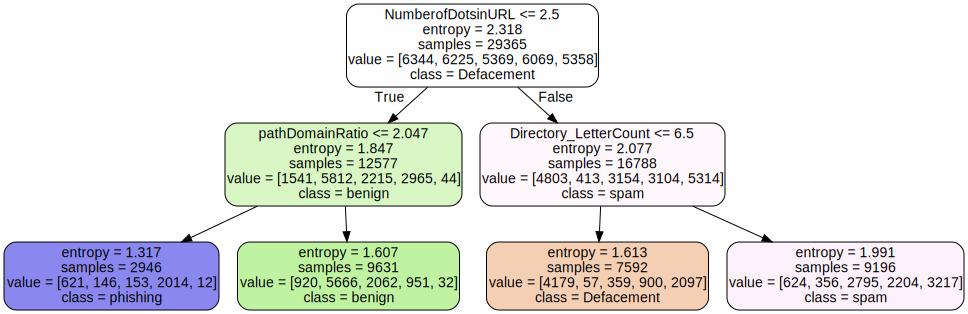

In [ ]:
tree_entropy_depth_2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
tree_entropy_depth_2.fit(X_train, y_train)

# Visualizing the Entropy based Decision Tree
graph_data = tree.export_graphviz(tree_entropy_depth_2, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,
                                class_names=class_names)
graph = graphviz.Source(graph_data)
graph